### **Fundamentos-analitica-II**
FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS APLICADAS
 
MAESTRÍA EN CIENCIA DE DATOS

TIC 60153 – Fundamentos de analítica II

*PROYECTO DE PRONOSTICO DE PSA PARA PACIENTES ENTRE 48 Y 60 AÑOS*

GRUPO:
- Esteban Ordoñez
- Raul Echeverry
- Fabian Salazar Figueroa
    

__________________________

### **Descripción**

Contexto de negocio.

El cáncer de próstata es uno de los tipos de cáncer más comunes en hombres. La detección temprana es crucial para mejorar las tasas de supervivencia. La prueba de antígeno prostático específico (PSA) puede ayudar a detectar el cáncer de próstata en etapas tempranas, cuando es más tratable. Sin embargo, el PSA no es específico para el cáncer de próstata y puede estar elevado en otras condiciones como prostatitis o hiperplasia prostática benigna (HPB).

El antígeno prostático específico (PSA) es una proteína producida por células normales y malignas de la glándula prostática. La prueba del PSA mide el nivel de esta proteína en la sangre y es uno de los métodos más utilizados para el tamizaje del cáncer de próstata.

La EPS SaludPorTi, está interesado en priorizar la toma de está prueba, aumentando la demanda y detención temprana del Cáncer de Próstata.

Problema de negocio
La empresa ha decidido contratarlos para que construyan un modelo predictivo que permita estimar la probabilidad de que un usuario entre 48 y 60 años de edad presente resultados anormales de PSA.


Contexto analítico

Se espera que entrene diferentes familias de modelos predictivos de clasificación (SVC con diferentes kernels, Redes Neuronales poco profundas), precedidos por diferentes procesos de transformación (normalizaciones, imputación, feature engineering, dummificación, PCA, selección de features).


La evaluación de la calidad de los flujos de modelos predictivos se debe estimar utilizando la métrica de ROC_AUC.

Expliquen sus ideas, el por qué realizan las acciones, y comenten los resultados obtenidos; se espera mucho más que unos bloques de código.
La toma de decisiones sobre los datos se debe hacer considerando el contexto del problema y de los datos, no se puede ver todo solamente desde los ojos de los datos, sino también considerar el negocio.
Un Científico de Datos debe poder comunicar los puntos importantes de su trabajo en un lenguaje universal para todos los públicos.
Todo esto se considerará en la nota.

_________________________________________________________________________________________________________________________________________________________________________________________

### **Flujo de trabajo completo y detallado**
**1.	Definición del problema y objetivos del negocio**
- Definir el objetivo clave: predecir si un paciente entre 48 y 60 años tendrá un resultado anormal de PSA, ayudando a priorizar las pruebas para una detección temprana del cáncer de próstata.

**2.	Análisis exploratorio de datos (EDA)**
- Revisar la distribución de las variables.
- Verificar la correlación entre las características.
- Detectar valores faltantes, outliers, y estudiar las relaciones de las características con la variable objetivo.
- Explorar diferencias entre las clases objetivo (PSA normal vs anormal).

**3.	Preprocesamiento de datos**
- Imputar valores faltantes.
- Escalar las variables numéricas (normalización o estandarización).
- Codificar las variables categóricas mediante dummificación (One-Hot Encoding).
- Considerar técnicas como reducción de dimensionalidad (PCA) si es necesario.
- Crear un pipeline de preprocesamiento para que los datos estén listos para usarse en los modelos.

**4.	Selección de modelos iniciales**
- Probar diferentes familias de modelos de clasificación:
    - **Support Vector Classifier (SVC)** con diferentes kernels (linear, rbf, poly).
    - Otros modelos iniciales como **Redes Neuronales** poco profundas (que implementaremos más adelante).
- Comparar su rendimiento inicial usando métricas como **ROC-AUC**.
    
**5.	Optimización de hiperparámetros (Optimización Bayesiana)**
- Optimizar los hiperparámetros del modelo, como C, gamma para SVC y n_components para PCA usando optimización bayesiana.
- Ajustar los modelos para maximizar su rendimiento, evaluando en cada iteración con **validación cruzada**.

**6.	Evaluación de los modelos optimizados**
- 6.1 Visualización de las curvas ROC para los modelos optimizados:
    - Aquí incluimos la visualización de las curvas ROC para los modelos optimizados (SVC con PCA) y comparamos su rendimiento.
    - Calcular el área bajo la curva (AUC) para comparar el rendimiento de los diferentes modelos en términos de sensibilidad y especificidad.
- 6.2 Comparación con otros modelos adicionales (redes neuronales poco profundas):
    - Añadir un modelo de redes neuronales poco profundas (MLPClassifier) y comparar su curva ROC con los otros modelos.
    - Realizar una comparación directa en términos de **ROC-AUC**.

**7.	Interpretación de resultados y recomendaciones**
- Interpretar los resultados de los modelos, incluyendo las métricas clave como ROC-AUC y la importancia de las características (en el caso del modelo SVC, a través de los vectores soporte o coeficientes).
- Seleccionar el mejor modelo en base a las métricas y explicar cómo este modelo puede ser implementado en la práctica para priorizar las pruebas de PSA.

**8.	Conclusiones y comunicación**
- Resumir los hallazgos clave para diferentes audiencias (tanto técnicas como no técnicas).
- Presentar recomendaciones basadas en el análisis y los resultados de los modelos para la toma de decisiones empresariales.

_____________________________

### **1. Definición del problema y objetivos del negocio**

**Objetivo:** Desarrollar un modelo de clasificación que prediga si un paciente entre 48 y 60 años tendrá un nivel anormal de PSA. Esto es clave para priorizar las pruebas y detectar el cáncer de próstata en etapas tempranas.

- **Predicción:** Etiqueta binaria, con resultados normales (0) o anormales (1) en la prueba de PSA.
- **Métrica de evaluación:** ROC-AUC, dado que queremos balancear entre los falsos positivos y falsos negativos.

In [2]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline
# Librería para el manejo de expresiones regulares
import re

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings("ignore")


### **Lectura de datos**

In [2]:
df_train = pd.read_parquet(r"https://github.com/alfa7g7/Fundamentos-analitica-II/raw/refs/heads/main/UNIDAD%20II/Data/df_train.parquet")
print(df_train.shape)
df_train.head()

(23494, 46)


,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Target,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
16484,12.0,3.0,3.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,58373.057143,-110021.200000,1.885690e+05
11528,6.0,1.0,1.0,2,0.5,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,19618.942857,-36176.133333,9.747050e+04
26630,1.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,1,398534.000000,-626628.000000,2.304723e+06
12586,6.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1292.600000,13410.733333,5.380450e+04
11225,3.0,0.0,2.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,0,13728.714286,-27375.666667,4.134967e+04


In [3]:
df_test = pd.read_parquet(r"https://github.com/alfa7g7/Fundamentos-analitica-II/raw/refs/heads/main/UNIDAD%20II/Data/df_test.parquet")
print(df_test.shape)
df_test.head()

(10069, 45)


,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
12596,2.0,4.0,2.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,5.421180e+06,-1.256617e+07,9.611937e+06
29326,4.0,0.0,1.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-9.504343e+03,5.997787e+04,8.013800e+04
24338,0.0,0.0,1.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,2.477143e+03,-5.780000e+03,1.734000e+04
11167,1.0,0.0,0.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,1,0,1,0,1,0,0,3.597143e+03,-8.393333e+03,2.518000e+04
22074,36.0,0.0,1.0,3,0.666667,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,-9.042514e+03,6.309881e+05,5.993393e+05


In [ ]:
#pasar a csv para análisis campesino
#df.to_csv(r"C:\Users\alfa7\OneDrive\Documentos\ICESI\MAESTRIA CIENCIA DE DATOS\2do semestre\Fundamentos de analitica II\Unidad II\Proyecto PSA\Data\df_train.csv")
#df1.to_csv(r"C:\Users\alfa7\OneDrive\Documentos\ICESI\MAESTRIA CIENCIA DE DATOS\2do semestre\Fundamentos de analitica II\Unidad II\Proyecto PSA\Data\df_test.csv")

### **2. Análisis Explotarorio de Datos**

El análisis exploratorio nos ayudará a comprender mejor el conjunto de datos, incluyendo:

- Distribución de la variable objetivo (PSA normal vs anormal).
- Características demográficas (edad, estado de salud general, historial médico).
- Visualización de correlaciones entre las características y el resultado de PSA.
- Outliers y valores faltantes en las variables predictoras.

In [4]:
# Revisamos las dimensiones del conjunto de datos  
rows, col = df_train.shape
print ("Dimensiones del conjunto de datos: {}" . format (df_train.shape))
print ('Filas:', rows, '\nColumnas:', col)

Dimensiones del conjunto de datos: (23494, 46)
Filas: 23494 
Columnas: 46


In [5]:
# Información acerca del dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23494 entries, 16484 to 9409
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MEDICAMENTOS                   23494 non-null  float64
 1   MEDICINA ESPECIALIZADA         23494 non-null  float64
 2   MEDICINA GENERAL               23494 non-null  float64
 3   Cant_gr_flia                   23494 non-null  int64  
 4   Cant_riesgos_flia_mean         23494 non-null  float64
 5   min_Tiempo_CP_Fliar            8 non-null      float64
 6   Cant_Fliar_CP                  23494 non-null  float64
 7   psa_max_gr_flia                164 non-null    float64
 8   psa_min_gr_flia                164 non-null    float64
 9   Cant_Fliar_riesgos             23494 non-null  float64
 10  cantidad_serv_flia             23494 non-null  float64
 11  Pendiente_flia                 23494 non-null  float64
 12  Intercepto_flia                23494 non-null  f

In [6]:
df_train.dtypes

MEDICAMENTOS                     float64
MEDICINA ESPECIALIZADA           float64
MEDICINA GENERAL                 float64
Cant_gr_flia                       int64
Cant_riesgos_flia_mean           float64
min_Tiempo_CP_Fliar              float64
Cant_Fliar_CP                    float64
psa_max_gr_flia                  float64
psa_min_gr_flia                  float64
Cant_Fliar_riesgos               float64
cantidad_serv_flia               float64
Pendiente_flia                   float64
Intercepto_flia                  float64
Promedio_costo_flia              float64
ESTADO_CIVI                       object
PROGRAMA                          object
estrato                           object
IMC                               object
AGRUPACION_SISTOLICA              object
AGRUPACION_DIASTOLICA             object
parentesco                        object
EDAD                             float64
RIESGOS                          float64
CANTIDAD_SERVICIOS               float64
PERDIDA_DE_PESO 

In [7]:
df_train.describe()

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,RIESGOS,CANTIDAD_SERVICIOS,PERDIDA_DE_PESO,TIEMPO_ULTIMA_CITA,conteo_dx_diferentes,TIEMPO_AFILIACION,Target,Pendiente,Intercepto,Promedio_costo
count,23494.000000,23494.000000,23494.000000,23494.000000,23494.000000,8.000000,23494.000000,164.000000,164.000000,23494.000000,...,7211.000000,23494.000000,5771.000000,23494.000000,23494.000000,23494.000000,23494.000000,2.349400e+04,2.349400e+04,2.349400e+04
mean,5.201669,1.285094,1.244190,2.451392,0.227974,95.000000,0.000341,8.538970,2.986841,0.291947,...,1.492997,8.861156,0.170005,2.219928,2.918532,135.953520,0.284626,1.485093e+04,1.495688e+05,3.107291e+05
std,8.830948,2.669005,1.337775,1.153336,0.485658,86.194133,0.018450,44.400913,4.734082,0.454761,...,0.792335,12.090472,8.040427,3.991257,2.193799,104.881494,0.451246,4.270672e+05,1.854731e+06,1.424497e+06
min,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,0.000000,0.005000,0.000000,0.000000,...,1.000000,1.000000,-62.500000,1.000000,1.000000,7.000000,0.000000,-2.030057e+07,-3.337852e+07,1.000000e+00
25%,0.000000,0.000000,0.000000,2.000000,0.000000,41.000000,0.000000,0.978750,0.845750,0.000000,...,1.000000,2.000000,-2.560000,1.000000,1.000000,38.000000,0.000000,-4.412050e+03,-1.678853e+04,3.267192e+04
50%,2.000000,0.000000,1.000000,2.000000,0.000000,73.000000,0.000000,2.420000,1.785000,0.000000,...,1.000000,5.000000,0.000000,1.000000,2.000000,103.000000,0.000000,3.118857e+03,4.090667e+03,7.961250e+04
75%,6.000000,1.000000,2.000000,3.000000,0.333333,102.250000,0.000000,4.995000,3.552500,1.000000,...,2.000000,11.000000,2.270000,2.000000,4.000000,244.000000,1.000000,1.459710e+04,7.573733e+04,1.793700e+05
max,91.000000,44.000000,23.000000,10.000000,6.000000,284.000000,1.000000,550.000000,49.000000,2.000000,...,8.000000,262.000000,157.140000,36.000000,25.000000,350.000000,1.000000,1.490708e+07,1.013168e+08,9.516344e+07


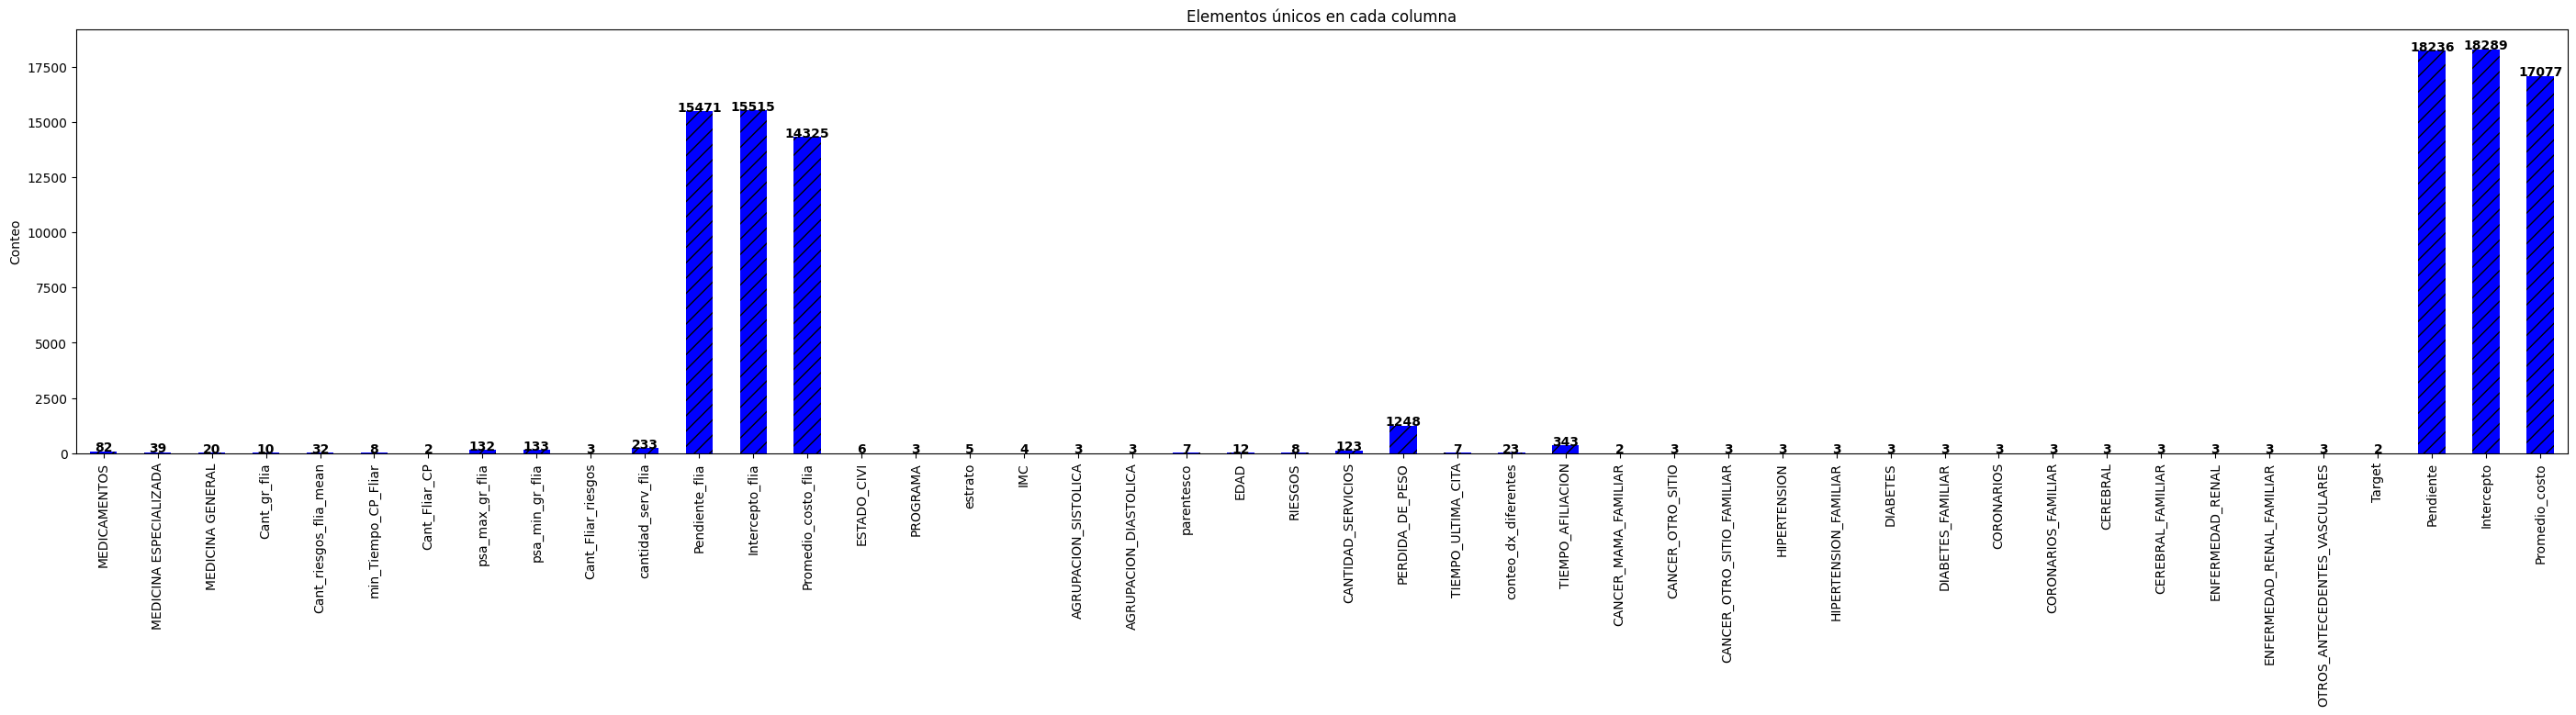

In [8]:
unique = df_train.nunique()
plt.figure(figsize=(35, 6))
unique.plot(kind='bar', color='blue', hatch='//')
plt.title('Elementos únicos en cada columna')
plt.ylabel('Conteo')
for i, v in enumerate(unique.values):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')
plt.show()

Revisamos los datos faltantes mediante un mapa de calor

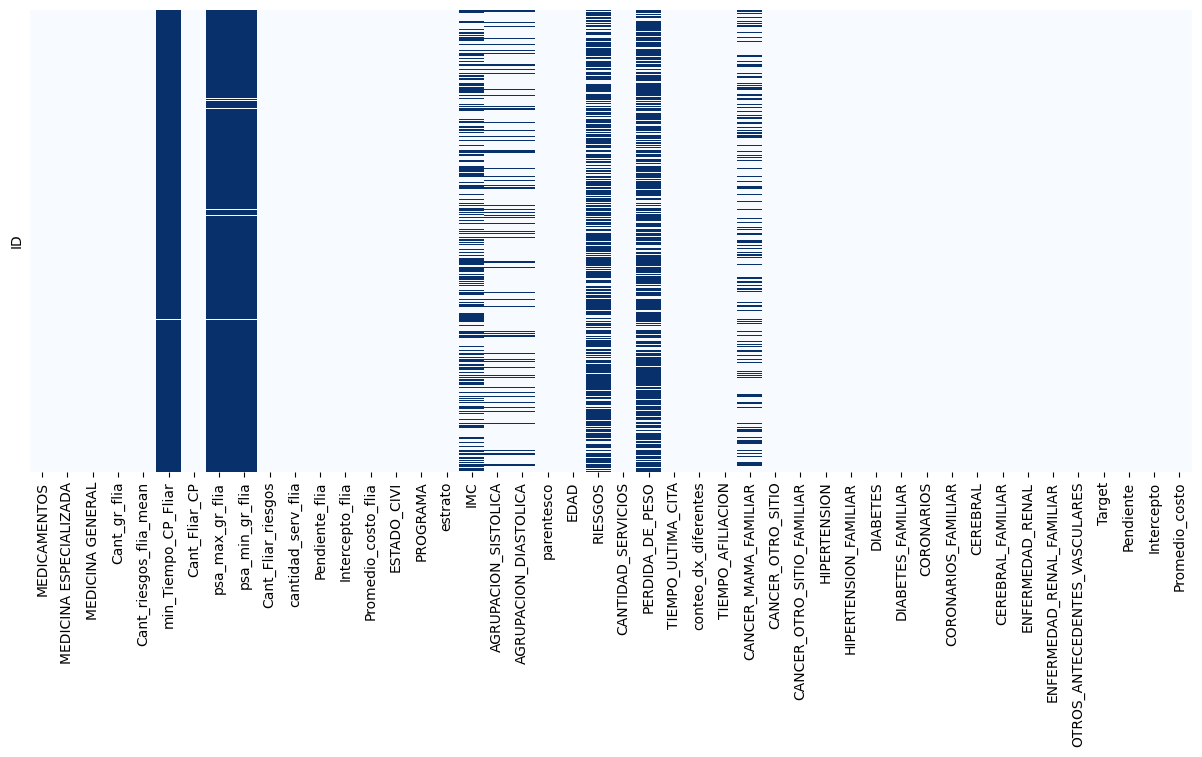

In [9]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes
plt.figure(figsize=(15,6))
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [10]:
df_train.isnull().sum()

MEDICAMENTOS                         0
MEDICINA ESPECIALIZADA               0
MEDICINA GENERAL                     0
Cant_gr_flia                         0
Cant_riesgos_flia_mean               0
min_Tiempo_CP_Fliar              23486
Cant_Fliar_CP                        0
psa_max_gr_flia                  23330
psa_min_gr_flia                  23330
Cant_Fliar_riesgos                   0
cantidad_serv_flia                   0
Pendiente_flia                       0
Intercepto_flia                      0
Promedio_costo_flia                  0
ESTADO_CIVI                          0
PROGRAMA                             0
estrato                              0
IMC                              10364
AGRUPACION_SISTOLICA              3320
AGRUPACION_DIASTOLICA             3320
parentesco                           0
EDAD                                 0
RIESGOS                          16283
CANTIDAD_SERVICIOS                   0
PERDIDA_DE_PESO                  17723
TIEMPO_ULTIMA_CITA       

In [11]:
# Calculamos el porcentaje de valores nulos por columna
percent_missing = df_train.isnull().mean() * 100
print(percent_missing)


MEDICAMENTOS                      0.000000
MEDICINA ESPECIALIZADA            0.000000
MEDICINA GENERAL                  0.000000
Cant_gr_flia                      0.000000
Cant_riesgos_flia_mean            0.000000
min_Tiempo_CP_Fliar              99.965949
Cant_Fliar_CP                     0.000000
psa_max_gr_flia                  99.301949
psa_min_gr_flia                  99.301949
Cant_Fliar_riesgos                0.000000
cantidad_serv_flia                0.000000
Pendiente_flia                    0.000000
Intercepto_flia                   0.000000
Promedio_costo_flia               0.000000
ESTADO_CIVI                       0.000000
PROGRAMA                          0.000000
estrato                           0.000000
IMC                              44.113391
AGRUPACION_SISTOLICA             14.131268
AGRUPACION_DIASTOLICA            14.131268
parentesco                        0.000000
EDAD                              0.000000
RIESGOS                          69.307057
CANTIDAD_SE

Cada columna tiene 23494 regsitros y de las 46(45 independientes y 1 dependiente), tenemos 9 con datos faltantes o nulos.

- min_Tiempo_CP_Fliar              23486 faltantes >= 99%
- psa_max_gr_flia                  23330 faltantes >= 99%
- psa_min_gr_flia                  23330 faltantes >= 99%
- IMC                              10364 faltantes >= 44%
- AGRUPACION_SISTOLICA              3320 faltantes >= 14%
- AGRUPACION_DIASTOLICA             3320 faltantes >= 14%
- RIESGOS                          16283 faltantes >= 69%
- PERDIDA_DE_PESO                  17723 faltantes >= 75%
- CANCER_MAMA_FAMILIAR              6802 faltantes >= 28%



Teniendo este panorama decidimos buscar un poco de ayuda con profesionales de area médica para dicidir que camino tomar en la imputación y eliminación de variables llegando a las siguientes conclusiones:

1. La variable **CANCER_MAMA_FAMILIAR** la imputadremos con una categoria que indique no ha sido medido o tomado. Esta desición se consultó con el host de la competencia después de ser analizada por el grupo de especialistas obteniedo acuerdo de él también, citamos su respuesta: "Tienes razón con la imputación de la variable cancer de mama familiar, no sería sano imputar con metodologias de ML, sin embargo, se puede agregar una categoria que indique que el valor no se evidencia". De acuerdo a como estaba formateada la variable esta nueva categoría es '2'.

2. La variable **RIESGOS** será imputada con un valor personalizado 0, debido a un argumento expresado por el host de la competencia: "Para el caso de los RIESGOS, los valores nulos corresponden a que aun no se les ha identifcado algun riesgo, por lo tanto, se pueden marcar con 0 (cero) riesgos".

3. La variable **IMC** será imputada con una nueva categoria para su valores faltantes, su valor es: 'No_medido'. Aquí un grupo de médico especialistas nos indicó que podría ser un grave error imputar por moda este campo ya que el IMC en la vida y experiencia real del trato de este tipo de cancer si da o brinda información importante a través de las cuales los especialistas pueden identificar de una mejor manera éste pronóstico. 

4. Las variables **min_Tiempo_CP_Fliar**, **psa_max_gr_flia** y **psa_min_gr_flia** serán eliminadas para la creación de los modelos pues presentan más del 99% de valores faltantes.

5. La variable **PERDIDA_DE_PESO** será eliminada para la creación de los modelos debido a que presenta más del 75% de valores faltantes

6. Las variables **AGRUPACION_SISTOLICA** y **AGRUPACION_DIASTOLICA** serán imputadas de forma tradicional sin buscar una forma especial debido a la significancia expresada por el grupo de especialistas sobre estas mismas, incluso más adelante se denotará si incluso podrían ser no tenidas en cuenta.

In [22]:
# Separar variable objetivo y características
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para renombrar columnas y hacer el cambio específico
def format_columns(df):
    result = df.copy()
    new_cols = []
    for col in result.columns:
        new_col = re.sub(r'\s+', ' ', col.strip()).replace(' ', '_').lower()  # Minúsculas y guiones bajos
        new_cols.append(new_col)
    result.columns = new_cols
    result = result.rename(columns={'estado_civi': 'estado_civil'})  # Renombrar la columna específica
    return result

# Transformador para renombrar columnas
class Rename_columns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return format_columns(X)

# Transformador para imputar valores específicos
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, custom_values):
        self.custom_values = custom_values

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for idx, value in self.custom_values.items():
            result.iloc[:, idx].fillna(value, inplace=True)  # Imputar usando el índice
        return result

# Transformador para eliminar columnas con muchos nulos
class DropColumnsByMissingValues(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.72):
        self.threshold = threshold
        self.columns_to_drop = []

    def fit(self, X, y=None):
        percent_missing = X.isnull().mean()
        self.columns_to_drop = percent_missing[percent_missing > self.threshold].index
        return self

    def transform(self, X, y=None):
        return X.drop(columns=self.columns_to_drop)

# Definir los valores específicos para la imputación personalizada
custom_values = {
    28: '2',  # CANCER_MAMA_FAMILIAR
    22: 0,  # RIESGOS
    17: 'No_medido'  # IMC
}

# Preprocesamiento numérico y categórico
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesador sin FeatureSelector
preprocessor = Pipeline(steps=[
    ('rename_columns', Rename_columns()),  # Renombrar las columnas primero
    ('custom_imputer', CustomImputer(custom_values)),  # Imputar valores específicos
    ('drop_columns', DropColumnsByMissingValues(0.72)),  # Eliminar columnas con más del 72% de nulos
])

# Después de aplicar el pipeline de preprocesamiento, seleccionamos las columnas
X_train_renamed = preprocessor.fit_transform(X_train)

print(f'Columnas después del renombrado: {X_train_renamed.columns}')


# Definir las columnas categóricas y numéricas de manera explícita después del renombrado
numeric_features = X_train_renamed.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_renamed.select_dtypes(include=['object', 'category']).columns

# Asegúrate de que estas columnas son las que esperas que existan
print(f'Columnas numéricas: {numeric_features}')
print(f'Columnas categóricas: {categorical_features}')

# ColumnTransformer para aplicar PCA solo a las variables numéricas
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num_pca', Pipeline(steps=[
            ('numeric_transformer', numeric_transformer),
            ('pca', PCA(n_components=10))  # Aplica PCA solo a las numéricas
        ]), numeric_features),
        ('cat', categorical_transformer, categorical_features)  # Codifica solo las categóricas
    ]
)

# Lista de kernels disponibles para optimización
kernels = ['linear', 'rbf', 'poly']

# Definir los límites de los parámetros para la optimización bayesiana
param_bounds = {
    'C': (0.1, 10),  # Rango del parámetro de regularización de SVC
    'gamma': (0.0001, 1),  # Rango del parámetro gamma para kernels no lineales
    'n_components': (2, min(20, len(numeric_features))),  # Número de componentes de PCA (2 a máximo 20)
    'kernel_idx': (0, len(kernels) - 1)  # Índices de los kernels a evaluar (0: 'linear', 1: 'rbf', 2: 'poly')
}

# Función para optimización bayesiana con SVC + PCA aplicado solo a variables numéricas
def optimize_svc_pca(C, gamma, n_components, kernel_idx):
    """Función objetivo para optimización bayesiana del SVC + PCA aplicado solo a variables numéricas"""
    kernel = kernels[int(kernel_idx)]  # Convertir el índice del kernel en el nombre del kernel
    
    model_svc = Pipeline(steps=[
        ('preprocessor', full_preprocessor),
        ('classifier', SVC(probability=True, kernel=kernel, C=C, gamma=gamma))
    ])
    
    # Validación cruzada y cálculo del AUC
    auc = cross_val_score(model_svc, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return auc

# Optimización Bayesiana
optimizer = BayesianOptimization(
    f=lambda C, gamma, n_components, kernel_idx: optimize_svc_pca(C, gamma, int(n_components), kernel_idx), 
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Ejecutar la optimización bayesiana
optimizer.maximize(init_points=5, n_iter=15)

# Guardar los mejores resultados del optimizador
best_result = optimizer.max
best_params = best_result['params']

# Convertir el índice del kernel al nombre del kernel
best_kernel_idx = int(best_params['kernel_idx'])
best_kernel = kernels[best_kernel_idx]  # Usar el índice para obtener el kernel

# Mostrar los mejores parámetros
print(f'Mejores parámetros encontrados:')
print(f'Kernel: {best_kernel}')
print(f'C: {best_params["C"]}')
print(f'Gamma: {best_params["gamma"]}')
print(f'Número de componentes PCA: {int(best_params["n_components"])}')
print(f'Mejora del ROC-AUC: {best_result["target"]}\n')

# Entrenar el mejor modelo con los mejores parámetros encontrados
best_model_svc = Pipeline(steps=[
    ('preprocessor', full_preprocessor),
    ('classifier', SVC(probability=True, kernel=best_kernel, C=best_params['C'], gamma=best_params['gamma']))
])

# Ajustar el mejor modelo con los datos de entrenamiento
best_model_svc.fit(X_train, y_train)

# Predecir las probabilidades para el conjunto de prueba
y_pred_proba = best_model_svc.predict_proba(X_test)[:, 1]

# Calcular el ROC-AUC en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Mostrar el resultado final
print(f'ROC-AUC en conjunto de prueba con el mejor kernel ({best_kernel}): {roc_auc}')

Columnas después del renombrado: Index(['medicamentos', 'medicina_especializada', 'medicina_general',
       'cant_gr_flia', 'cant_riesgos_flia_mean', 'cant_fliar_cp',
       'cant_fliar_riesgos', 'cantidad_serv_flia', 'pendiente_flia',
       'intercepto_flia', 'promedio_costo_flia', 'estado_civil', 'programa',
       'estrato', 'imc', 'agrupacion_sistolica', 'agrupacion_diastolica',
       'parentesco', 'edad', 'riesgos', 'cantidad_servicios',
       'tiempo_ultima_cita', 'conteo_dx_diferentes', 'tiempo_afiliacion',
       'cancer_mama_familiar', 'cancer_otro_sitio',
       'cancer_otro_sitio_familiar', 'hipertension', 'hipertension_familiar',
       'diabetes', 'diabetes_familiar', 'coronarios', 'coronarios_familiar',
       'cerebral', 'cerebral_familiar', 'enfermedad_renal',
       'enfermedad_renal_familiar', 'otros_antecedentes_vasculares',
       'pendiente', 'intercepto', 'promedio_costo'],
      dtype='object')
Columnas numéricas: Index(['medicamentos', 'medicina_especializad

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\pandas\core\indexes\base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'medicamentos'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\__init__.py", line 505, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\pandas\core\indexes\base.py", line 3798, in get_loc
    raise KeyError(key) from err
KeyError: 'medicamentos'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py", line 906, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py", line 496, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\__init__.py", line 513, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe
